Le problème de désaxement des clients d’une entreprise (Churn problem) :

On a choisit d'utiliser la méthodologie CRISP qui se décompose de 6 étapes :
 La compréhension du problème métier (Business Understanding) ==>
 La compréhension des données (Data Understanding) ==>
 La préparation des données (Data Preparation) ==>
 Modeling ==>
 Evaluation ==> Deployment

1/ Business Understanding :


Le nombre des clients et le profit sont deux variables corrélées ==> quand le nombre des clients augment alors le profit augmente aussi et dans ce problème on va prédire si le client va changer d'opérateur télephonique ou bien il va rester et dans le cas ou le client va désabonner alors l'entreprise doit maximiser ses profits en lui donnant des offres pour qu'il décide de rester ou bien travailler sur le coté marketing dans le but d'ajout des nouveaux clients et on remarque qu'on va maximiser le profit en concentrant sur la fidélisation des clients présents au lieu de recruter des nouveaux clients.

Pour conclure le but de ce projet est de permettre à un opérateur télephonique de prédire si un client va décider de désabonner a fin de détecter ces clients et essayer de les garder et d'augmenter la fidélisation de ces derniers.

2/ Data Understanding :

In [2]:
#chargement des modules utiles
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#chargement des données
df = pd.read_csv("Telco_customer_churn1.csv")
df.head(3)

,Unnamed: 0,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [49]:
#La liste des variables 
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Count', 'Country', 'State', 'City',
       'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7043 non-null   int64  
 1   CustomerID         7043 non-null   object 
 2   Count              7043 non-null   int64  
 3   Country            7043 non-null   object 
 4   State              7043 non-null   object 
 5   City               7043 non-null   object 
 6   Zip Code           7043 non-null   int64  
 7   Lat Long           7043 non-null   object 
 8   Latitude           7043 non-null   float64
 9   Longitude          7043 non-null   float64
 10  Gender             7043 non-null   object 
 11  Senior Citizen     7043 non-null   object 
 12  Partner            7043 non-null   object 
 13  Dependents         7043 non-null   object 
 14  Tenure Months      7043 non-null   int64  
 15  Phone Service      7043 non-null   object 
 16  Multiple Lines     7043 

On remarque l'existance de plusieurs variables catégoriques qui nécessiteront un encodage, en plus il n'y'a pas des valeurs manquantes sauf au niveau du dernier colonne "Churn Reason".

In [6]:
df.shape
#on a 7043 clients et 33 variables.

(7043, 34)

In [7]:
# Vérification de l'existance des champs manquants 
df.isna().sum()

Unnamed: 0              0
CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [8]:
df[df["Churn Reason"].isna()==True]

,Unnamed: 0,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1869,1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,27,3964,NaN
1870,1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,...,One year,No,Mailed check,56.95,1889.5,No,0,61,3441,NaN
1871,1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,66,4307,NaN
1872,1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,...,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,43,4459,NaN
1873,1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,...,Month-to-month,No,Mailed check,29.75,301.9,No,0,51,2013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


On remarque que les valeurs manquantes ne sont pas réellement manquantes puisqu'elles sont associées à Churn Label = No 
donc puisque le client n'a pas désabonné donc il y'a pas de cause de désabonnement .
d'abord je pense que cet variable n'a pas d'info qui va nous aider dans la prédiction mais il va étre primordial dans un autre probléme qui sert à minimiser les désabonnements en trouvant des solutions pour réduire le nombre de désabonnements sur un opérateur télephonique.

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,7043,NaN,NaN,NaN,3521,2033.28,0,1760.5,3521,5281.5,7042
CustomerID,7043,7043,3889-VWBID,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Count,7043,NaN,NaN,NaN,1,0,1,1,1,1,1
Country,7043,1,United States,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,7043,1,California,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,7043,1129,Los Angeles,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code,7043,NaN,NaN,NaN,93522,1865.79,90001,92102,93552,95351,96161
Lat Long,7043,1652,"32.782501, -117.01611",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,7043,NaN,NaN,NaN,36.2824,2.45572,32.5558,34.0309,36.3918,38.2249,41.9621
Longitude,7043,NaN,NaN,NaN,-119.799,2.15789,-124.301,-121.815,-119.731,-118.043,-114.193


In [10]:
#Comparaison quantitative entre la moyenne et la médiane  
abs((df.mean()-df.median())/df.mean())

Unnamed: 0         0.000000
Count              0.000000
Zip Code           0.000321
Latitude           0.003013
Longitude          0.000568
Tenure Months      0.104141
Monthly Charges    0.086290
Churn Value        1.000000
Churn Score        0.039193
CLTV               0.028794
dtype: float64

Existance des points aberrants :
si la valeur moyenne est trés loin de la médiane donc il y'a des point aberrants on peut conclure qu'on n'a pas de points aberrants
Pour le moment on ne va pas s'intéresser sur les points abérrants.

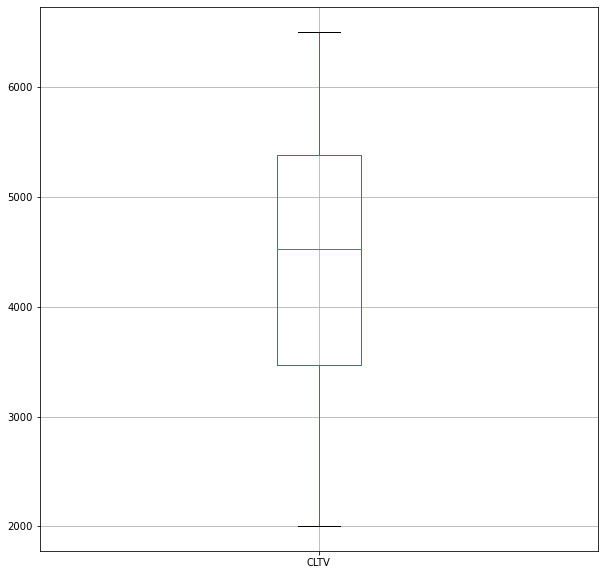

In [11]:
df[["CLTV"]].boxplot(figsize=(10,10));

Comme vous voyez pour le variable CLTV par exemple on n'a pas des points aberrants.

In [12]:
df["Churn Value"].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

<AxesSubplot:xlabel='Churn Value', ylabel='count'>

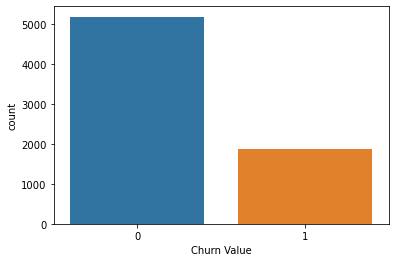

In [13]:
sns.countplot(x=df["Churn Value"])

<AxesSubplot:xlabel='Zip Code', ylabel='count'>

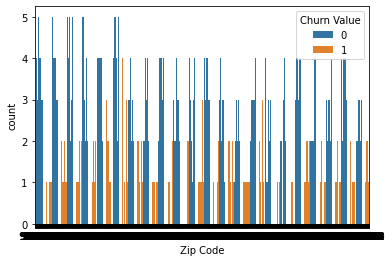

In [14]:
sns.countplot(x="Zip Code",hue="Churn Value",data=df)

Pour la variable "Zip Code" le churn number est définie entre 1 et 4 personnes donc c'est pas utile d'utiliser cette variable pour conclure une difference entre 1652 catégories.

In [15]:
df["Zip Code"].value_counts()

92139    5
91306    5
90602    5
90502    5
90402    5
        ..
92335    4
95385    4
92339    4
92347    4
95531    4
Name: Zip Code, Length: 1652, dtype: int64

<AxesSubplot:xlabel='City', ylabel='count'>

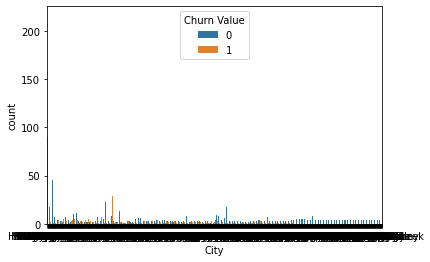

In [39]:
sns.countplot(x="City",hue="Churn Value",data=df)

Pour la variable "City" on remarque la grande différence en terme de personnes qui désabonnent en une seule ville en les comparant avec les autres villes mais on va supprimer cette variable puisque'elle contienne 1129 catégories .

<AxesSubplot:xlabel='Gender', ylabel='count'>

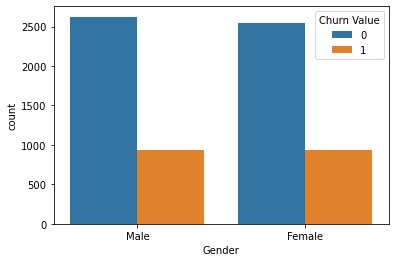

In [17]:
sns.countplot(x="Gender",hue="Churn Value",data=df)

on peut rien conclure puisque le nombre des hommes désabonnés est presque égal au nombre de femmes désabonnées.

<AxesSubplot:xlabel='Senior Citizen', ylabel='count'>

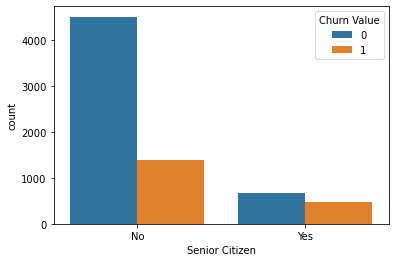

In [18]:
sns.countplot(x="Senior Citizen",hue="Churn Value",data=df)

In [19]:
pd.crosstab(df["Senior Citizen"],df["Churn Value"])

Churn Value,0,1
Senior Citizen,,
No,4508,1393
Yes,666,476


on remarque que 42% des personnes les plus agés vont désabonner alors que 23% des personnes les moins agés vont désabonner 
De plus, on remarque que le nombre des personnes les moins agés qui vont quitter est largement grand par rapport au nombre des personnes les plus agés. 

<AxesSubplot:xlabel='Partner', ylabel='count'>

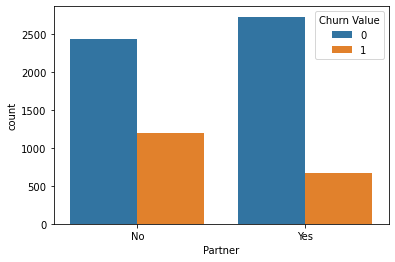

In [20]:
sns.countplot(x="Partner",hue="Churn Value",data=df)

on remarque que le nombre de churn qui ont du partenaire sont plus que les churn qui n'ont pas du partenaire.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

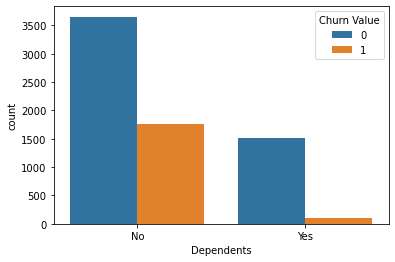

In [21]:
sns.countplot(x="Dependents",hue="Churn Value",data=df)

On remarque une grosse difference entre les churn non dependents et les churn dependents de plu les dependents contient un nombre 
de churn trés petit qu'on peut le negliger devant le nombre de dependents

<AxesSubplot:xlabel='Phone Service', ylabel='count'>

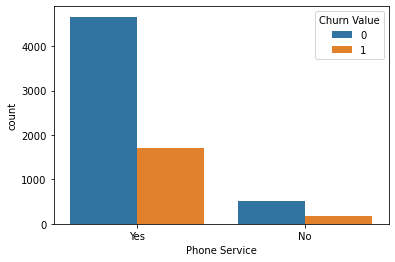

In [22]:
sns.countplot(x="Phone Service",hue="Churn Value",data=df)

On remarque que le nombre de churn qui ont un phone service et trés grand en le comparant avec les churn qui n'ont pas un phone 
service mais aprés qu'on a fait un calcul de pourcentage on remarque que la pourcentage des churn qui ont un phone service est presque égal (26%) au churn qui n'ont pas du phone service alors on peut supprimer cet colonne 

In [23]:
pd.crosstab(df["Phone Service"],df["Churn Value"])

Churn Value,0,1
Phone Service,,
No,512,170
Yes,4662,1699


<AxesSubplot:xlabel='Multiple Lines', ylabel='count'>

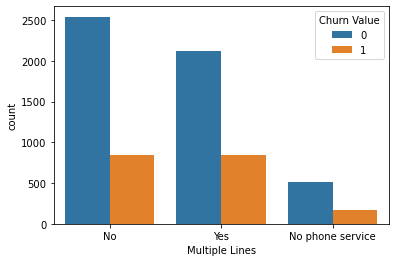

In [24]:
sns.countplot(x="Multiple Lines",hue="Churn Value",data=df)

In [25]:
pd.crosstab(df["Multiple Lines"],df["Churn Value"])

Churn Value,0,1
Multiple Lines,,
No,2541,849
No phone service,512,170
Yes,2121,850


De meme on va supprimer cette colonne puisque la pourcentage des differents catégories de churn sont presque égaux (25%)
donc cet colonne n'a pas d'impact sur le churn status.

<AxesSubplot:xlabel='Internet Service', ylabel='count'>

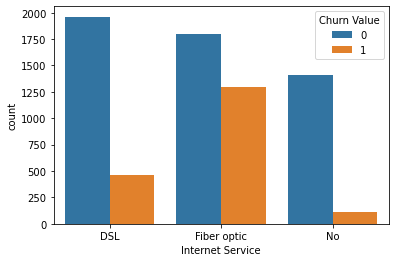

In [26]:
sns.countplot(x="Internet Service",hue="Churn Value",data=df)

In [27]:
pd.crosstab(df["Internet Service"],df["Churn Value"])

Churn Value,0,1
Internet Service,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


on remarque une grande difference en terme de pourcentage surtout entre les churn qui utilisent dsl (19%) et les churn qui utilisent le fibre optique (42%) de plus on a une pourcentage faible des churn qui n'ont pas d'internet (7.5%) donc on peut conclure que cet colonne donne beaucoup d'informations sur le churn status.

<AxesSubplot:xlabel='Online Security', ylabel='count'>

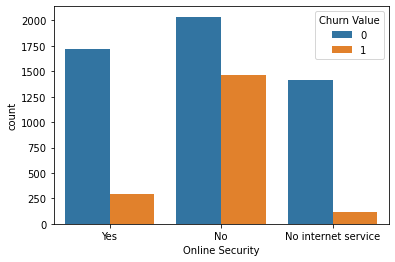

In [28]:
sns.countplot(x="Online Security",hue="Churn Value",data=df)

les churn qui n'ont pas une sécurité en ligne sont les plus grands en terme de pourcentage . 

<AxesSubplot:xlabel='Online Backup', ylabel='count'>

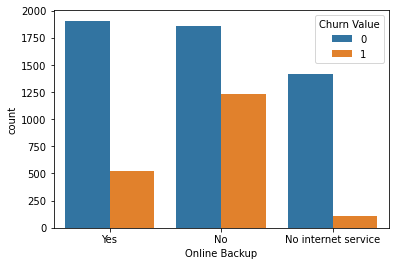

In [29]:
sns.countplot(x="Online Backup",hue="Churn Value",data=df)

les churn qui n'ont pas un online backup(sauvegarde enligne) sont les plus grands en terme de pourcentage . 

<AxesSubplot:xlabel='Device Protection', ylabel='count'>

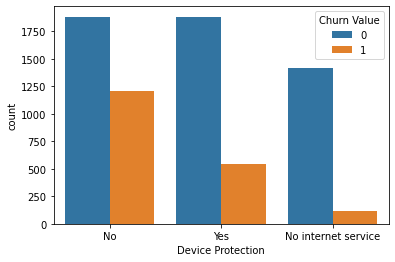

In [30]:
sns.countplot(x="Device Protection",hue="Churn Value",data=df)

on peut conclure que la plupart des personnes qui quittent sont celui qui n'ont pas un device protection.

<AxesSubplot:xlabel='Tech Support', ylabel='count'>

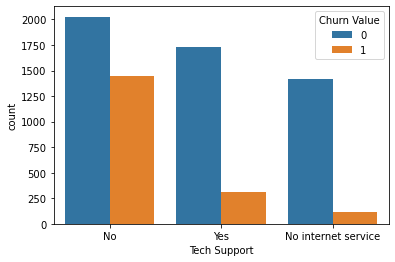

In [31]:
sns.countplot(x="Tech Support",hue="Churn Value",data=df)

on peut conclure que la plupart des personnes qui quittent sont celui qui n'ont pas du tech support.

<AxesSubplot:xlabel='Streaming TV', ylabel='count'>

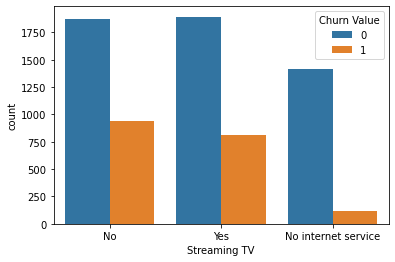

In [32]:
sns.countplot(x="Streaming TV",hue="Churn Value",data=df)

On remarque que la plupart des personnes qui quittent sont celui qui ont le service internet . de plus la pourcentage de churn qui ont streaming TV est presque égal aux churn qui n'ont pas du streaming TV.

<AxesSubplot:xlabel='Streaming Movies', ylabel='count'>

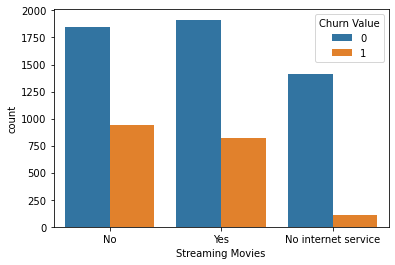

In [33]:
sns.countplot(x="Streaming Movies",hue="Churn Value",data=df)

On remarque que la plupart des personnes qui quittent sont celui qui ont le service internet . de plus la pourcentage de churn qui ont streaming Movies est presque égal aux churn qui n'ont pas du streaming Movies.

<AxesSubplot:xlabel='Contract', ylabel='count'>

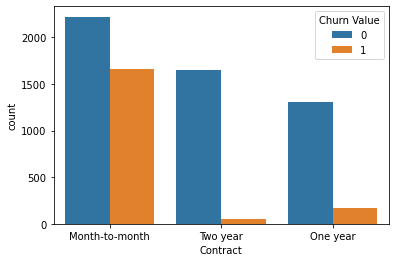

In [34]:
sns.countplot(x="Contract",hue="Churn Value",data=df)

on remarque que la plupart des churn sont celui qui ont le contrat month to month aprés ca on trouve le contrat annuel et la plus petite pourcentage est celle de contrat de deux ans.

<AxesSubplot:xlabel='Paperless Billing', ylabel='count'>

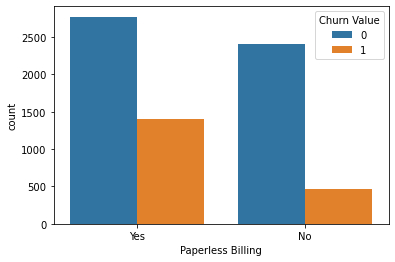

In [35]:
sns.countplot(x="Paperless Billing",hue="Churn Value",data=df)

In [36]:
#facturation sans papier
#no 16%
#yes 33%
pd.crosstab(df["Paperless Billing"],df["Churn Value"])

Churn Value,0,1
Paperless Billing,,
No,2403,469
Yes,2771,1400


on remarque que la plupart des personnes qui quittent sont celui qui ont une facturation sans papier.

<AxesSubplot:xlabel='Payment Method', ylabel='count'>

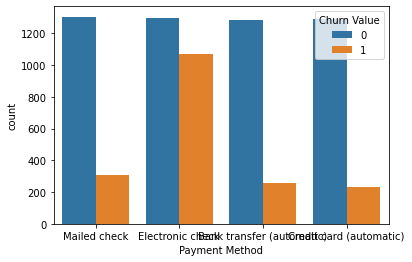

In [37]:
sns.countplot(x="Payment Method",hue="Churn Value",data=df)

On remarque que la plupart des churn sont les personnent qui payent avec l'electronic bank aprés ca on trouve la methode mailed check et la plus petite pourcentage est celle de bank transfer et credit card.

Conclusion :
Pour conclure les variables qu'on n'a pas besoin et on va les supprimer sont :
'CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code','Gender', 'Phone Service','Multiple Lines', 'Churn Label','Churn Score', 'Churn Reason', 'Lat Long','Longitude', 'Latitude'.


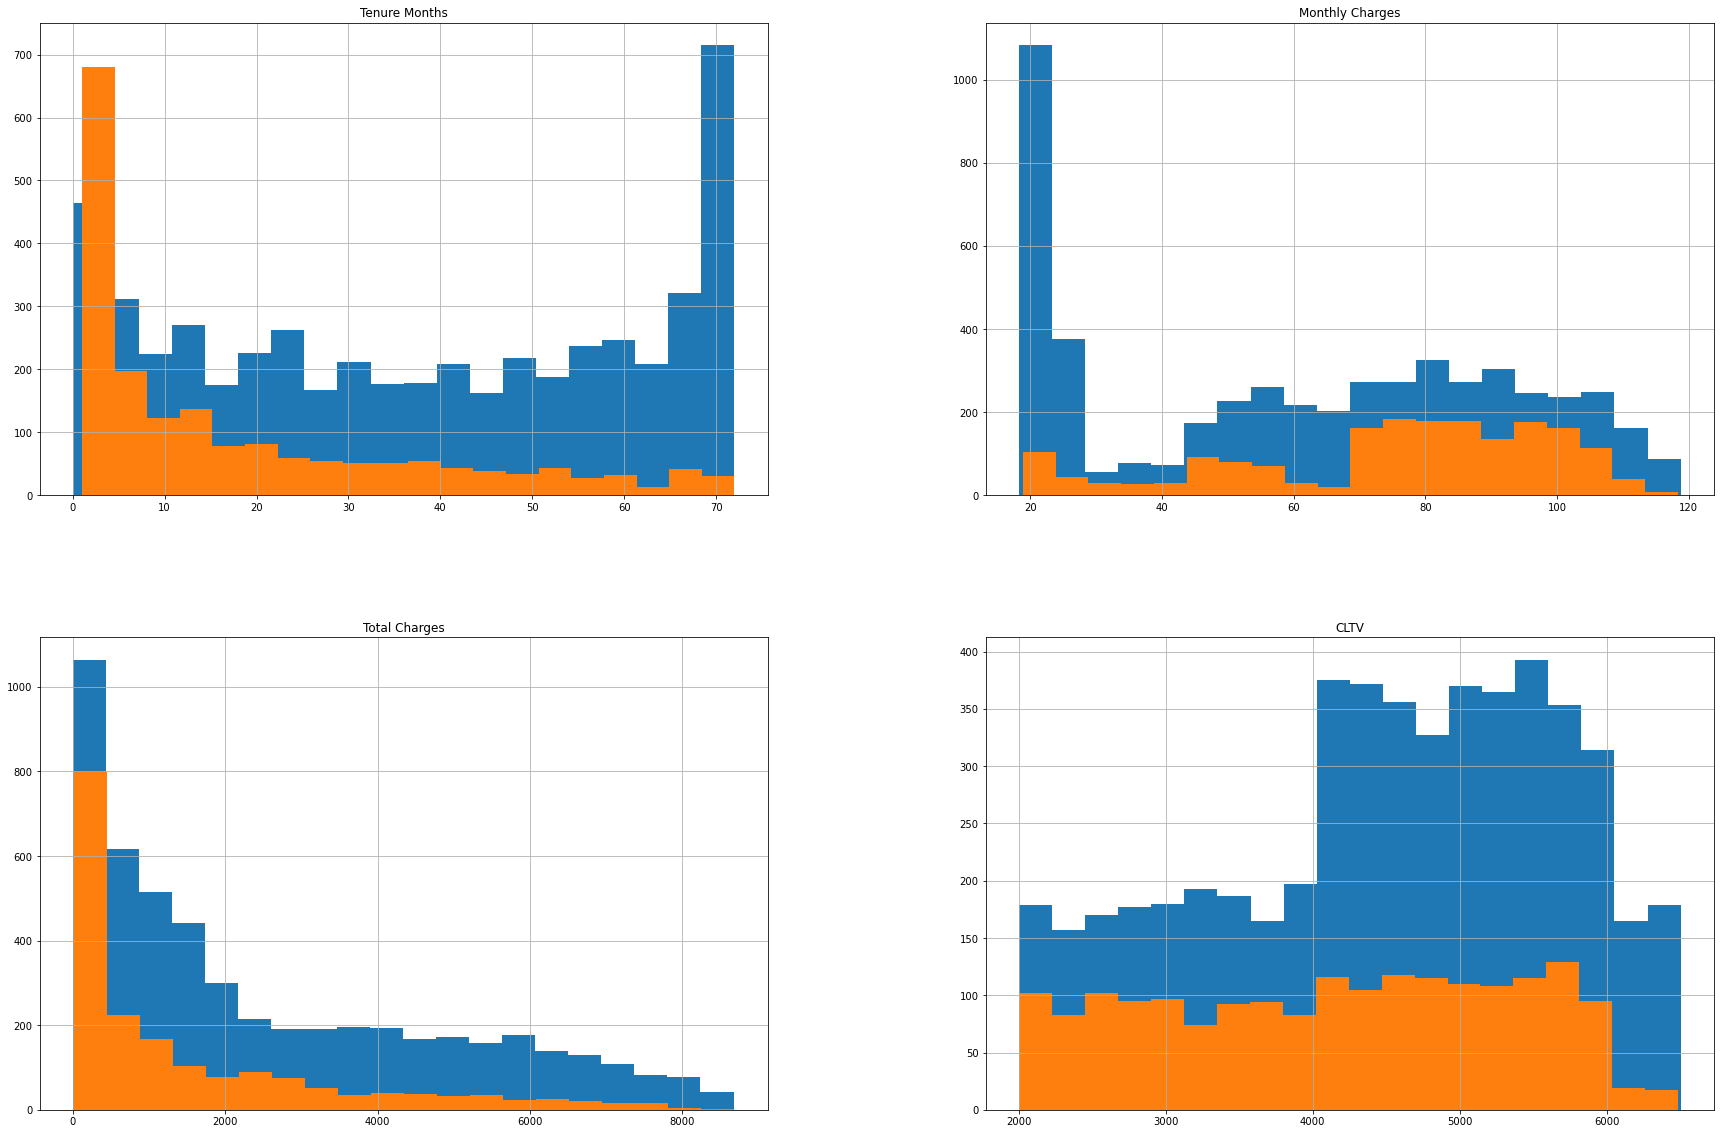

In [38]:
df['Total Charges'] = df['Total Charges'].replace(" ", 0).astype('float64')
numerical_features=['Tenure Months','Monthly Charges', 'Total Charges', 'CLTV']
fig,ax=plt.subplots(2,2,figsize=(30,20))
df[df["Churn Value"]==0][numerical_features].hist(bins=20,ax=ax)
df[df["Churn Value"]==1][numerical_features].hist(bins=20,ax=ax);

Tenure Months : la plupart des gens qui quittent sont celui de tenure months entre 0 et 20
Monthly Charges : la plupart des gens qui quittent sont celui de Monthly Charges entre 70 et 105
Total Charges : la plupart des gens qui quittent sont celui de Total Charges entre 0 et 3000
CLTV : la plupart des gens qui quittent sont celui de CLTV entre 2000 et 6100

Pour conclure les colonnes qu'on va travailler avec sont respectivement : 
 'Senior Citizen','Partner', 'Dependents', 'Tenure Months', 'Internet Service', 'Online Security','Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV','Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method','Monthly Charges', 'Total Charges', 'Churn Value', 'CLTV'.

3/Data Preparation :

In [50]:
df.drop(columns=['Unnamed: 0', 'CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Phone Service',
       'Multiple Lines', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Reason'],axis=1,inplace=True)

In [51]:
df.columns

Index(['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Churn Score',
       'CLTV'],
      dtype='object')

In [45]:
df.head()

,Senior Citizen,Partner,Dependents,Tenure Months,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Value,CLTV
0,No,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1,3239
1,No,No,Yes,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1,2701
2,No,No,Yes,8,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1,5372
3,No,Yes,Yes,28,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1,5003
4,No,No,Yes,49,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),1,5340


## <font color='blue'>preparation de x et y</font>

Tout d'abord, séparez les valeurs x et y.
y serait notre classe qui est la colonne Churn dans cet ensemble de données(target).
x serait les colonnes restantes(features).

In [221]:
#y = data.Churn Value.values
y = df.iloc[:, 14].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [233]:
X = df.drop(['Churn Value'],axis=1)
X

,Senior Citizen,Partner,Dependents,Tenure Months,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,CLTV
0,No,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,3239
1,No,No,Yes,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,2701
2,No,No,Yes,8,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,5372
3,No,Yes,Yes,28,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,5003
4,No,No,Yes,49,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,No,No,72,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),5306
7039,No,Yes,Yes,24,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,2140
7040,No,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),5560
7041,No,Yes,Yes,11,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,2793


## <font color='blue'>l' encodage des données catégoriques</font>


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [234]:
labelencoder_X = LabelEncoder()
columns_to_convert = ['Senior Citizen',
                      'Partner', 
                      'Dependents',
                      'Internet Service',
                      'Online Security',
                      'Online Backup',
                      'Device Protection',
                      'Tech Support', 
                      'Streaming TV',
                      'Streaming Movies',
                      'Contract', 
                      'Payment Method',  
                      'Paperless Billing']

for i in columns_to_convert:
    X[i] =  labelencoder_X.fit_transform(X[i])

In [235]:
X

,Senior Citizen,Partner,Dependents,Tenure Months,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,CLTV
0,0,0,0,2,0,2,2,0,0,0,0,0,1,3,3239
1,0,0,1,2,1,0,0,0,0,0,0,0,1,2,2701
2,0,0,1,8,1,0,0,2,0,2,2,0,1,2,5372
3,0,1,1,28,1,0,0,2,2,2,2,0,1,2,5003
4,0,0,1,49,1,0,2,2,0,2,2,0,1,0,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,72,2,1,1,1,1,1,1,2,1,0,5306
7039,0,1,1,24,0,2,0,2,2,2,2,1,1,3,2140
7040,0,1,1,72,1,0,2,2,0,2,2,1,1,1,5560
7041,0,1,1,11,0,2,0,0,0,0,0,0,1,2,2793


In [236]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Senior Citizen,7043,2,No,5901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,5416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tenure Months,7043,NaN,NaN,NaN,32.3711,24.5595,0,9,29,55,72
Internet Service,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Online Security,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Online Backup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Device Protection,7043,3,No,3095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tech Support,7043,3,No,3473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Streaming TV,7043,3,No,2810,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df.columns

Index(['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Churn Score',
       'CLTV'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Senior Citizen     7043 non-null   object
 1   Partner            7043 non-null   object
 2   Dependents         7043 non-null   object
 3   Tenure Months      7043 non-null   int64 
 4   Internet Service   7043 non-null   object
 5   Online Security    7043 non-null   object
 6   Online Backup      7043 non-null   object
 7   Device Protection  7043 non-null   object
 8   Tech Support       7043 non-null   object
 9   Streaming TV       7043 non-null   object
 10  Streaming Movies   7043 non-null   object
 11  Contract           7043 non-null   object
 12  Paperless Billing  7043 non-null   object
 13  Payment Method     7043 non-null   object
 14  Churn Score        7043 non-null   int64 
 15  CLTV               7043 non-null   int64 
dtypes: int64(3), object(13)
memory usage: 880.

In [54]:
X = df
X.head()

,Senior Citizen,Partner,Dependents,Tenure Months,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Score,CLTV
0,No,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,86,3239
1,No,No,Yes,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,67,2701
2,No,No,Yes,8,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,86,5372
3,No,Yes,Yes,28,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,84,5003
4,No,No,Yes,49,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),89,5340


In [55]:
onehotencoder =ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), ['Internet Service','Senior Citizen', 'Partner', 'Dependents',
            'Paperless Billing',
           'Online Security',
           'Online Backup',
           'Device Protection',
           'Tech Support', 
           'Streaming TV',
           'Streaming Movies',
           'Contract', 
           'Payment Method'])],  
)
X = onehotencoder.fit_transform(X) 


In [56]:
enc_df = pd.DataFrame(X)
enc_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7039,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7040,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7041,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [58]:
km.fit(X)

KMeans(n_clusters=3)

In [59]:
km.inertia_

33579.95968110399

In [60]:
km.cluster_centers_

array([[ 5.18162839e-01,  4.81837161e-01, -1.38777878e-15,
         8.55532359e-01,  1.44467641e-01,  2.93110647e-01,
         7.06889353e-01,  7.12734864e-01,  2.87265136e-01,
         3.70772443e-01,  6.29227557e-01,  3.95407098e-01,
        -1.38777878e-15,  6.04592902e-01,  3.29853862e-01,
        -1.38777878e-15,  6.70146138e-01,  2.72233820e-01,
        -1.38777878e-15,  7.27766180e-01,  3.39874739e-01,
        -1.38777878e-15,  6.60125261e-01,  2.96868476e-01,
        -1.38777878e-15,  7.03131524e-01,  2.89352818e-01,
        -1.38777878e-15,  7.10647182e-01,  1.87056367e-01,
         3.89561587e-01,  4.23382046e-01,  3.21503132e-01,
         3.24425887e-01,  2.27139875e-01,  1.26931106e-01],
       [-8.88178420e-16,  8.32667268e-16,  1.00000000e+00,
         9.65923984e-01,  3.40760157e-02,  5.16382700e-01,
         4.83617300e-01,  6.31061599e-01,  3.68938401e-01,
         7.07732634e-01,  2.92267366e-01, -1.11022302e-15,
         1.00000000e+00, -3.33066907e-16,  7.77156117e-

In [61]:
inertia =[]
K = np.arange(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    inertia.append(km.inertia_)

In [62]:
print(inertia)

[52206.88598608562, 38655.09318866931, 33579.93261410104, 31167.536900564755, 29755.118266486872, 28726.67627846825, 27934.824564830895, 27056.31761887893, 26404.58317745486, 25757.41732059305, 25333.657498288805, 24919.231590918822, 24546.960453711836, 24165.962944966483, 23929.748520024907, 23574.454878793465, 23274.43477944366, 22966.52819603094, 22781.988929764248, 22444.863554213753, 22272.500064736687, 21911.018284504178, 21848.42532508706, 21630.057265025276]


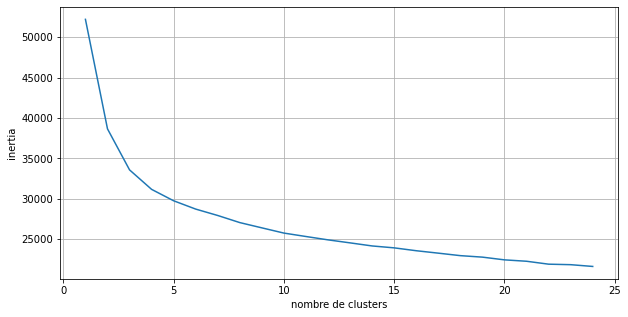

In [63]:
plt.figure(figsize=(10,5))
plt.plot(K, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('inertia')
plt.grid(True)
plt.show()

In [68]:
km = KMeans(n_clusters=3)

In [69]:
km.fit(X)

KMeans(n_clusters=3)

In [70]:
km.inertia_

33579.94995725722

In [71]:
km.cluster_centers_

array([[ 5.18363940e-01,  4.81636060e-01, -1.38777878e-15,
         8.55592654e-01,  1.44407346e-01,  2.93405676e-01,
         7.06594324e-01,  7.12437396e-01,  2.87562604e-01,
         3.71035058e-01,  6.28964942e-01,  3.95242070e-01,
        -1.38777878e-15,  6.04757930e-01,  3.29716194e-01,
        -1.38777878e-15,  6.70283806e-01,  2.72537563e-01,
        -1.38777878e-15,  7.27462437e-01,  3.40150250e-01,
        -1.38777878e-15,  6.59849750e-01,  2.97161937e-01,
        -1.38777878e-15,  7.02838063e-01,  2.89649416e-01,
        -1.38777878e-15,  7.10350584e-01,  1.86978297e-01,
         3.89816361e-01,  4.23205342e-01,  3.21368948e-01,
         3.24290484e-01,  2.27045075e-01,  1.27295492e-01],
       [-8.88178420e-16,  8.32667268e-16,  1.00000000e+00,
         9.65923984e-01,  3.40760157e-02,  5.16382700e-01,
         4.83617300e-01,  6.31061599e-01,  3.68938401e-01,
         7.07732634e-01,  2.92267366e-01, -1.16573418e-15,
         1.00000000e+00, -2.77555756e-16,  8.32667268e-

In [106]:
km.fit_transform(X)
Y = km.predict(X)
Y = Y.T
Y.shape
X = pd.DataFrame(X)
X['36'] = Y
X

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
7039,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2
7040,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
7041,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1


##  <font color='blue'>division de X et y en  training set ans test set</font>

In [ ]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_test.dtype

In [ ]:
X_train

In [ ]:
y_test

In [ ]:
X_test.shape

In [ ]:
X_train.shape

In [ ]:
y_test.shape

## <font color='blue'>Normalisation de X_train et X_test</font>

In [ ]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_train